# Data Preprocessing and Feature Engineering

## Feature Selection - Statistical Tests
I use two statistical methods to identify the most important features:
1. **ANOVA F-test**: Tests if feature means differ significantly across classes
2. **Mutual Information**: Measures dependency between features and target (handles non-linear relationships)

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df_prep = pd.read_csv(
    r"/home/samir-dahal/Diabetes_Classification/results/eda_results/eda_cleaned_diabetes_data.csv"
)

# Encode categorical variables
gender_encoder = LabelEncoder()
df_prep["Gender_encoded"] = gender_encoder.fit_transform(df_prep["Gender"])

class_encoder = LabelEncoder()
df_prep["CLASS_encoded"] = class_encoder.fit_transform(df_prep["CLASS"])

# Prepare features and target
X = df_prep.drop(columns=["No_Pation", "CLASS", "Gender", "CLASS_encoded"])
y = df_prep["CLASS_encoded"]

In [3]:
X.head()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender_encoded
0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,1
2,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,1


In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: CLASS_encoded, dtype: int64

In [ ]:
from sklearn.feature_selection import f_classif, mutual_info_classif

# ANOVA F-test
f_scores, p_values = f_classif(X, y)

anova_results = pd.DataFrame(
    {"Feature": X.columns, "F-Score": f_scores, "P-Value": p_values}
).sort_values("F-Score", ascending=False)

anova_results

,Feature,F-Score,P-Value
9,BMI,242.051861,8.217818e-86
3,HbA1c,210.696230,1.457470e-76
0,AGE,157.544547,7.026105e-60
5,TG,17.272981,4.270988e-08
4,Chol,11.355226,1.336699e-05
10,Gender_encoded,8.795762,1.639449e-04
8,VLDL,5.425953,4.537173e-03
1,Urea,2.485092,8.385487e-02
2,Cr,0.641488,5.267347e-01
6,HDL,0.445629,6.405538e-01


In [ ]:
mi_scores = mutual_info_classif(X, y, random_state=42)

mi_results = pd.DataFrame({"Feature": X.columns, "MI-Score": mi_scores}).sort_values(
    "MI-Score", ascending=False
)

mi_results

,Feature,MI-Score
3,HbA1c,0.404762
9,BMI,0.285307
0,AGE,0.241479
8,VLDL,0.062158
4,Chol,0.048416
5,TG,0.041032
7,LDL,0.031467
2,Cr,0.029681
6,HDL,0.021607
1,Urea,0.021101


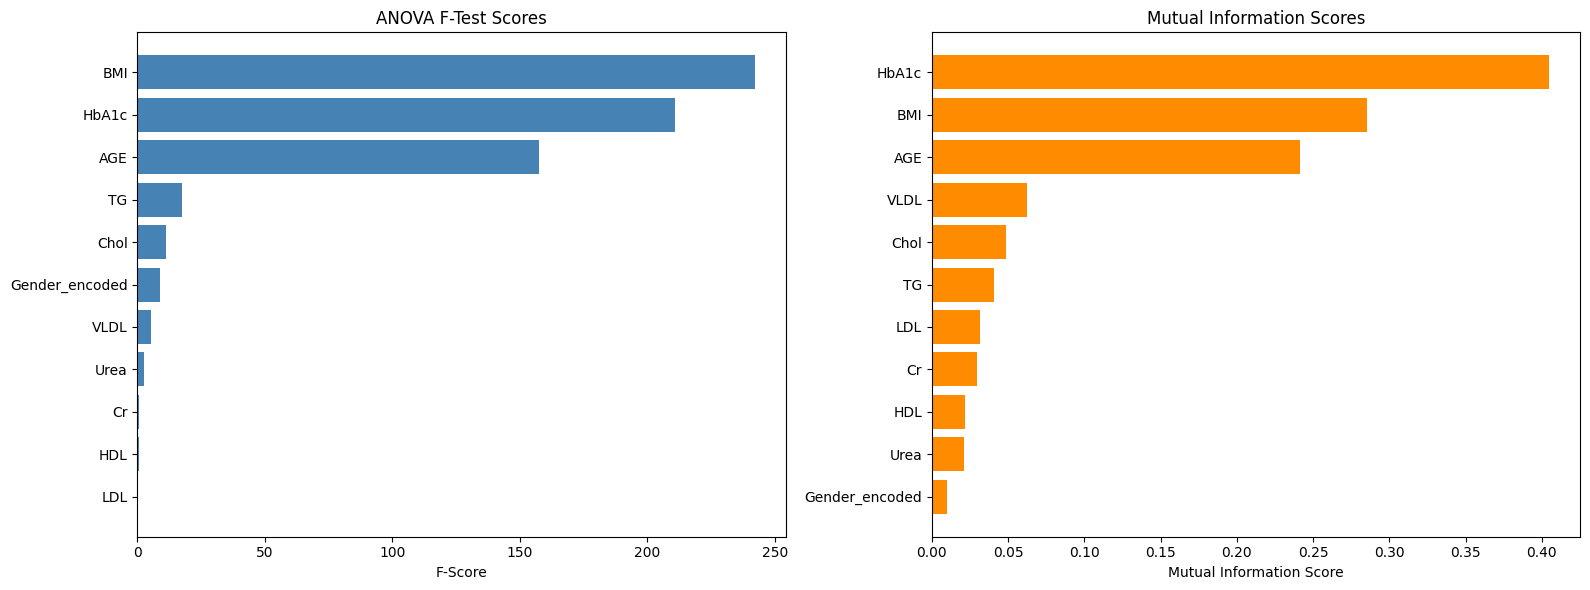

In [ ]:
# Compare which features are most important for predicting diabetes
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].barh(anova_results["Feature"], anova_results["F-Score"], color="steelblue")
axes[0].set_xlabel("F-Score")
axes[0].set_title("ANOVA F-Test Scores")
axes[0].invert_yaxis()

axes[1].barh(mi_results["Feature"], mi_results["MI-Score"], color="darkorange")
axes[1].set_xlabel("Mutual Information Score")
axes[1].set_title("Mutual Information Scores")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

combined_df = pd.DataFrame(
    {
        "Feature": X.columns,
        "F-Score_Norm": scaler.fit_transform(f_scores.reshape(-1, 1)).flatten(),
        "MI-Score_Norm": scaler.fit_transform(mi_scores.reshape(-1, 1)).flatten(),
    }
)

combined_df["Combined_Score"] = (
    combined_df["F-Score_Norm"] + combined_df["MI-Score_Norm"]
) / 2
combined_df = combined_df.sort_values("Combined_Score", ascending=False)

combined_df

,Feature,F-Score_Norm,MI-Score_Norm,Combined_Score
3,HbA1c,0.870288,1.000000,0.935144
9,BMI,1.000000,0.697557,0.848779
0,AGE,0.650411,0.586591,0.618501
8,VLDL,0.021127,0.132573,0.076850
5,TG,0.070136,0.079086,0.074611
4,Chol,0.045656,0.097781,0.071718
7,LDL,0.000000,0.054867,0.027433
2,Cr,0.001335,0.050346,0.025841
1,Urea,0.008962,0.028623,0.018792
10,Gender_encoded,0.035068,0.000000,0.017534


## Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df.head()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender_encoded
0,-0.388487,-0.132804,-0.389171,-1.340975,-0.513355,-1.022161,1.775241,-1.081172,-0.368239,-1.119695,-1.134943
1,-3.147980,-0.203659,-0.102682,-1.340975,-0.899123,-0.665120,-0.161625,-0.457032,-0.341404,-1.319852,0.881102
2,-0.388487,-0.132804,-0.389171,-1.340975,-0.513355,-1.022161,1.775241,-1.081172,-0.368239,-1.119695,-1.134943
3,-0.388487,-0.132804,-0.389171,-1.340975,-0.513355,-1.022161,1.775241,-1.081172,-0.368239,-1.119695,-1.134943
4,-2.343128,0.717454,-0.389171,-1.340975,0.026719,-0.950753,-0.608594,-0.546195,-0.395075,-1.720166,0.881102


In [17]:
# Verify scaling results
print("Mean should be closer to 0:")
print(X_scaled_df.mean().round(10))

print("\nStandard Deviation should be closer to 1:")
print(X_scaled_df.std().round(4))

Mean should be closer to 0:
AGE               0.0
Urea              0.0
Cr                0.0
HbA1c             0.0
Chol              0.0
TG               -0.0
HDL               0.0
LDL               0.0
VLDL              0.0
BMI               0.0
Gender_encoded   -0.0
dtype: float64

Standard Deviation should be closer to 1:
AGE               1.0005
Urea              1.0005
Cr                1.0005
HbA1c             1.0005
Chol              1.0005
TG                1.0005
HDL               1.0005
LDL               1.0005
VLDL              1.0005
BMI               1.0005
Gender_encoded    1.0005
dtype: float64


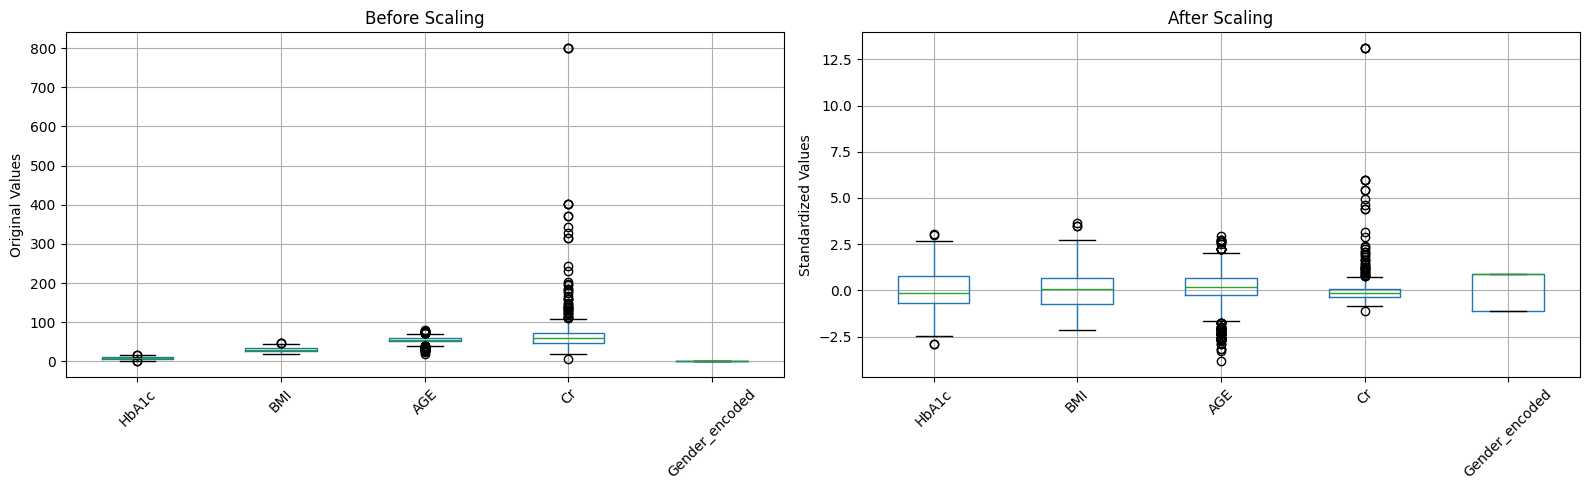

In [16]:
# Compare before and after scaling
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

top_5_features = ["HbA1c", "BMI", "AGE", "Cr", "Gender_encoded"]

X[top_5_features].boxplot(ax=axes[0])
axes[0].set_title("Before Scaling")
axes[0].set_ylabel("Original Values")
axes[0].tick_params(axis="x", rotation=45)

X_scaled_df[top_5_features].boxplot(ax=axes[1])
axes[1].set_title("After Scaling")
axes[1].set_ylabel("Standardized Values")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

## Train-Test Split (Stratified)
### Stratified Split
With severe class imbalance (Y=84%, N=10%, P=5%), a **random split** could result in:
- Test set with very few or NO prediabetic (P) samples
- Biased model evaluation


**Stratified split** ensures each set maintains the same class distribution as the original data.



In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 768 samples
Test set: 193 samples


In [25]:
# Verify class distribution across splits
class_names = {0: "Non-diabetic", 1: "Prediabetic", 2: "Diabetic"}

def show_distribution(name, data):
    print(f"\n{name}:")
    print((data.value_counts(normalize=True).sort_index() * 100)
          .round(2)
          .rename(class_names)
          .astype(str) + "%")

show_distribution("Original Data", y)
show_distribution("Training Set", y_train)
show_distribution("Test Set", y_test)



Original Data:
CLASS_encoded
Non-diabetic     10.2%
Prediabetic      5.52%
Diabetic        84.29%
Name: proportion, dtype: object

Training Set:
CLASS_encoded
Non-diabetic    10.16%
Prediabetic       5.6%
Diabetic        84.24%
Name: proportion, dtype: object

Test Set:
CLASS_encoded
Non-diabetic    10.36%
Prediabetic      5.18%
Diabetic        84.46%
Name: proportion, dtype: object


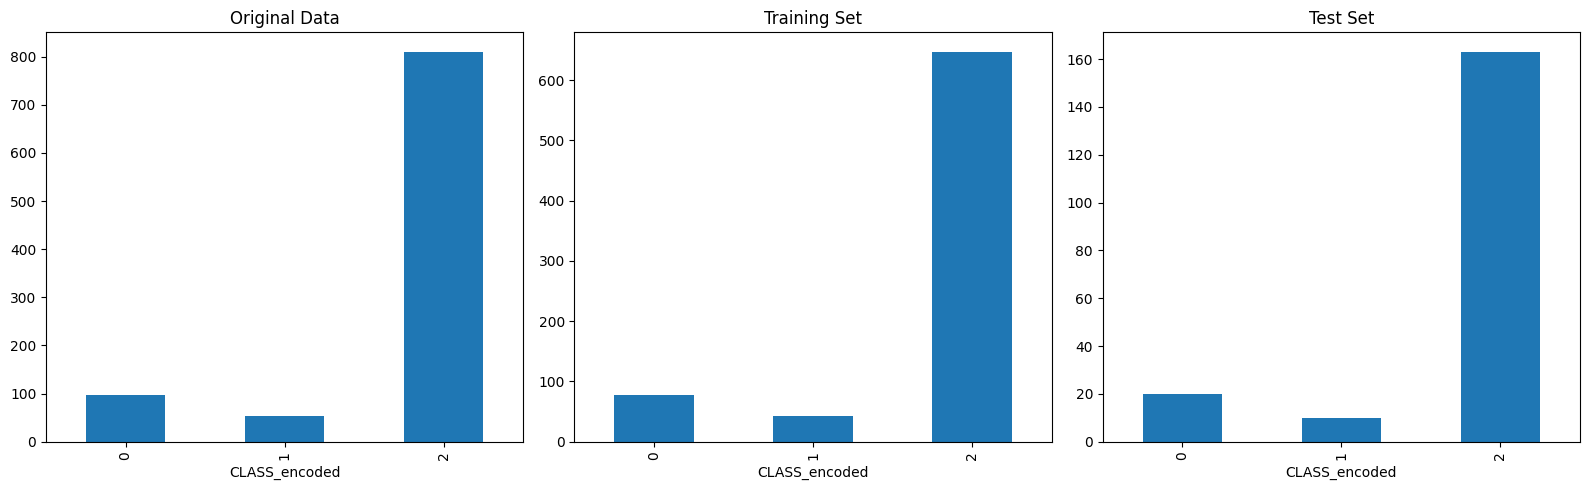

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

y.value_counts().sort_index().plot(kind="bar", ax=axes[0])
axes[0].set_title("Original Data")

y_train.value_counts().sort_index().plot(kind="bar", ax=axes[1])
axes[1].set_title("Training Set")

y_test.value_counts().sort_index().plot(kind="bar", ax=axes[2])
axes[2].set_title("Test Set")

plt.tight_layout()
plt.show()